## Base/ Given Accuracy  :89.11 </br>
## Base/ Given  Validation Accuracy  : 82.76 </br>

## Final  Accuracy  : 91.17</br>
## Final  Validation Accuracy  : 83.36</br>

###Epochs kept constant: 50


In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

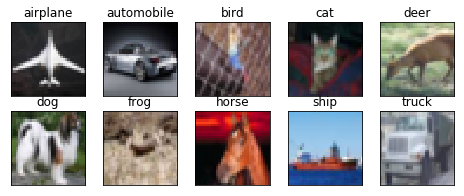

In [42]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [46]:
# Define the model
model = Sequential()

# Conv Block1
model.add(Convolution2D(32, 3, 3, use_bias=False,name='layer1',border_mode='same', input_shape=(32, 32, 3)))  #3       32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, use_bias=False,name='layer2',border_mode='same'))        #5             32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, use_bias=False,name='layer3',border_mode='same'))         #7                      32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Transition Block1
model.add(MaxPooling2D(pool_size=(2, 2)))                                                  #14             16
model.add(Convolution2D(32, 1, 1))


# Conv Block2
model.add(Convolution2D(64, 3, 3, use_bias=False,name='layer4',border_mode='same'))          #16          16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, use_bias=False,name='layer5',border_mode='same'))            #18       16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Transition Block2
model.add(MaxPooling2D(pool_size=(2, 2)))                                                       #36       8
model.add(Convolution2D(32, 1, 1))

# Conv Block3
model.add(Convolution2D(64, 3, 3, use_bias=False,name='layer6',border_mode='same'))               #38     8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, use_bias=False,name='layer7',border_mode='same'))               #40     8
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Final Block3
model.add(Convolution2D(10, 1, 1))
model.add(Dropout(0.25))
model.add(GlobalAveragePooling2D())

#model.add(Flatten())

model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), use_bias=False, name="layer1", input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
W0626 12:11:41.898880 139800630536064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), use_bias=False, name="layer2", padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), use_bias=False, name="layer3", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarn

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Conv2D)              (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_84 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_86 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
layer2 (Conv2D)              (None, 32, 32, 64)        18432     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_85 (Activation)   (None, 32, 32, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 50s 129ms/step - loss: 1.3834 - acc: 0.4918 - val_loss: 1.6801 - val_acc: 0.4314
Epoch 2/50
390/390 [==============================] - 48s 123ms/step - loss: 1.0080 - acc: 0.6396 - val_loss: 1.3513 - val_acc: 0.4956
Epoch 3/50
390/390 [==============================] - 48s 123ms/step - loss: 0.8648 - acc: 0.6940 - val_loss: 0.8966 - val_acc: 0.6860
Epoch 4/50
390/390 [==============================] - 48s 123ms/step - loss: 0.7681 - acc: 0.7294 - val_loss: 1.0506 - val_acc: 0.6383
Epoch 5/50
390/390 [==============================] - 48s 123ms/step - loss: 0.7006 - acc: 0.7563 - val_loss: 0.9520 - val_acc: 0.6649
Epoch 6/50
390/390 [==============================] - 48s 123ms/step - loss: 0.6498 - acc: 0.7733 - val_loss: 0.8117 - val_acc: 0.7199
Epoch 7/50
390/390 [==============================] - 48s 123ms/step - loss: 0.6089 - acc: 0.7878 - val_loss: 1.0043 - val_acc: 0.6382
Epoch 8/50
390/390 [==============================] - 4

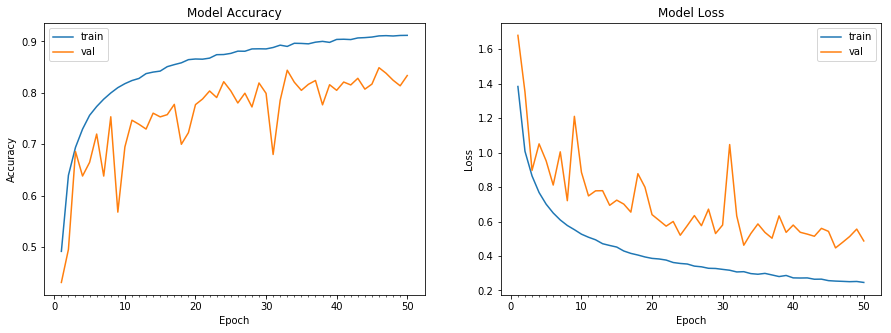

Accuracy on test data is: 83.36


In [48]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))